In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlib

In [2]:
df_sales = pd.read_csv('datasets/wine_sales_data.csv')

In [3]:
df_sales.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


## Selecting Vinho Verde wines from Portugal

In [4]:
df_sales_portugal = df_sales[(df_sales.country == 'Portugal') & (df_sales.province == 'Vinho Verde')]


In [5]:
df_sales_portugal.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
277,277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",Portal do Fidalgo,92,35.0,Vinho Verde,NaN,NaN,Alvarinho,Provam
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1378,1378,Portugal,Some wood aging has rounded out this fruity wi...,Daphne,91,NaN,Vinho Verde,NaN,NaN,Loureiro,Casal Paço Padreiro
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo


In [6]:
df_sales_portugal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 277 to 143575
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   396 non-null    int64  
 1   country      396 non-null    object 
 2   description  396 non-null    object 
 3   designation  301 non-null    object 
 4   points       396 non-null    int64  
 5   price        310 non-null    float64
 6   province     396 non-null    object 
 7   region_1     0 non-null      object 
 8   region_2     0 non-null      object 
 9   variety      396 non-null    object 
 10  winery       396 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 37.1+ KB


## Removing NA columns and data points

In [7]:
df_sales_portugal = df_sales_portugal.drop(['Unnamed: 0', 'region_1','region_2'],axis=1)

In [8]:
df_sales_portugal.dropna(inplace = True)

## Using describe and plotting in order to exclude outliers

In [9]:
df_sales_portugal.describe()

,points,price
count,233.000000,233.000000
mean,86.369099,11.424893
std,2.444432,5.069744
min,80.000000,5.000000
25%,84.000000,8.000000
50%,86.000000,10.000000
75%,88.000000,13.000000
max,92.000000,45.000000


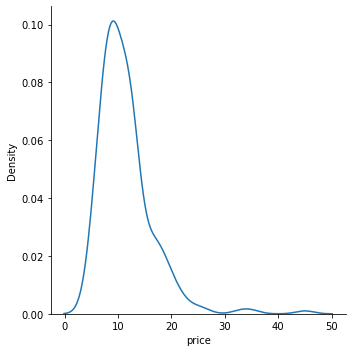

In [10]:
# plt.scatter(x = df_sales_portugal.points,y= df_sales_portugal.price)
sns.displot(data=df_sales_portugal,x='price',kind='kde',)

In [11]:
df_sales_portugal=df_sales_portugal[(df_sales_portugal.price>=8) & (df_sales_portugal.price <=25)]

In [12]:
df_sales_portugal.reset_index(drop = True, inplace = True)

## Binning the points into 3 categories

In [13]:
points = df_sales_portugal.points.unique()
points.sort()


In [14]:
df_sales_portugal.points.value_counts()

85    41
88    36
90    27
84    26
87    16
86    13
89    12
83     7
91     6
80     2
82     1
92     1
Name: points, dtype: int64

In [15]:
points

array([80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92])

In [16]:
df_sales_portugal['points_label']=df_sales_portugal.points.apply(lambda x: 'low' if x<=84
                                                                    else 'medium' if x<=88
                                                                    else 'high')

In [17]:
df = df_sales_portugal

## Analyzing the quality labels for statistical significance using Tukey's HSD

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result=pairwise_tukeyhsd(df['price'],df['points_label'],0.05)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  high    low  -6.0797 0.001 -7.6412 -4.5182   True
  high medium  -3.9225 0.001 -5.1614 -2.6835   True
   low medium   2.1572 0.001  0.8036  3.5109   True
---------------------------------------------------


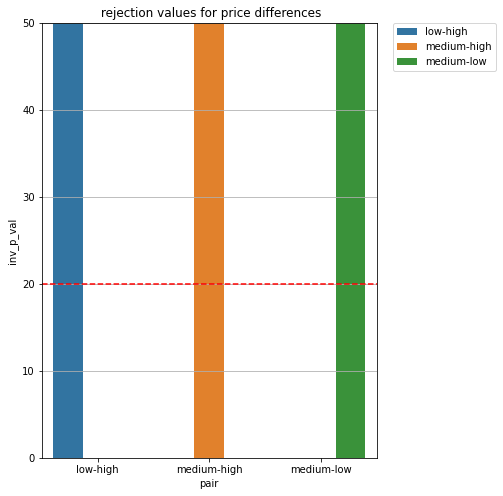

In [35]:
data = {'pair':['low-high', 'medium-high', 'medium-low'],
        'meandiff':tukey_result.meandiffs,
        'inv_p_val':tukey_result.pvalues**(-1)}
tukey_df = pd.DataFrame.from_dict(data)
fig, ax = plt.subplots(nrows=1, ncols = 1,figsize = (6,8))
fig.patch.set_facecolor('white')
sns.barplot(data = tukey_df,x='pair',y='inv_p_val', hue='pair', ax = ax)
ax.set_ylim(0,50)
ax.axhline(y = 0.05**(-1), c = 'r', linestyle = '--')
tit =f' rejection values for price differences'
ax.set_title(tit)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.grid(b=True, which='both', axis='y')
plt.savefig(f'plots/rejection value for quality labels by price.png', bbox_inches = 'tight')

## comparing through bar graph the median price of each quality label

In [20]:
labels = ['low','medium','high']
d = {
    'rating_name':['low','medium','high'],
    'mean':[],
    'median':[],
    '25%':[],
    '75%':[]}
for label in labels:
    d['mean'].append(df[df.points_label == label].describe().loc['mean'].price)
    d['median'].append(df[df.points_label == label].describe().loc['50%'].price)
    d['25%'].append(df[df.points_label == label].describe().loc['25%'].price)
    d['75%'].append(df[df.points_label == label].describe().loc['75%'].price)
df_sum = pd.DataFrame(data = d)
df_sum

,rating_name,mean,median,25%,75%
0,low,9.333333,9.0,8.0,10.0
1,medium,11.490566,11.0,9.0,13.0
2,high,15.413043,16.0,12.0,18.0


<ipython-input-41-ab9fccf32367>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transperant" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('plots/quality_price.png', bbox_inches = 'tight', transperant = False)


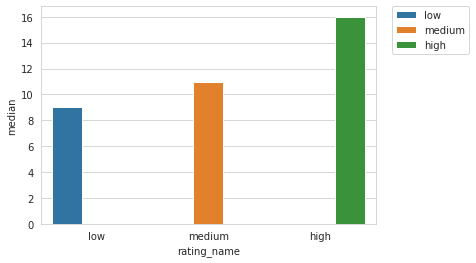

In [41]:
sns.barplot(data=df_sum,x='rating_name',y='median',hue = 'rating_name')
# plt.patch.set_facecolor('white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(b=True, which='both', axis='y')
plt.savefig('plots/quality_price.png', bbox_inches = 'tight', transperant = False)

df_sum.to_csv('datasets/wine_sales_portugal_sum.csv')

df.to_csv('datasets/wine_sales_portugal.csv')